<a href="https://colab.research.google.com/github/ashish-kr-upa/underwater-object-detection-/blob/main/notebooks/ashish-train-yolov8-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Nov  9 10:18:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
# 1. Are you adding any augmentations to the dataset. If yes, then which ones and why. If not, then why not?

# Augmentations like flip, brightness adjustment, and rotation were added. These were chosen to simulate diverse real-world conditions where object appearance might vary due to lighting or angles, helping the model generalize. Without augmentation, the model might overfit to the dataset's specific conditions, limiting its robustness.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [17]:
# Pip install method (recommended)

# !pip install ultralytics==8.2.103 -q
!pip install ultralytics==8.0.196 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [18]:
from ultralytics import YOLO

from IPython.display import display, Image

In [21]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jDSC2DIU0JJHXzVAVnUz")
project = rf.workspace("chandigarh-university-dmff9").project("underwater-object-detection-dweb8")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [35]:
# 2. How many epochs are you using for this dataset training?
#The model is set to train for 50 epochs. This number balances model performance and computational efficiency. Initial trials indicated that beyond 50 epochs, improvements plateaued, so this setting optimizes runtime.



# 3. List any other hyperparameters you are specifying while training. Give reasoning for same.
# model=yolov8s.pt: Specifies the YOLOv8 "small" model architecture as the starting point.
# imgsz=800: Sets the input image size for the model during training.
# plots=True: Enables the generation of training plots for visualizing metrics.

# Reasons why the above hyperparameters are used:
# model=yolov8s.pt: The "small" model balances speed and accuracy, ideal for efficient training.
# imgsz=800: Higher resolution improves detection of smaller details, benefiting accuracy without overloading resources.
# plots=True: Enables metric visualization, which is essential for tracking performance trends and making data-driven adjustments.

# Reasons why other hyperparametrs were not used:
# Optimized Defaults: YOLOv8's default settings (e.g., learning rate, batch size) are well-tuned for performance across tasks, reducing the need for extra tuning.
# Simplicity: Using essential hyperparameters (`epochs`, `imgsz`) keeps code clean and results consistent without complex adjustments.
# Flexible Customization: Additional parameters (e.g., `batch`, `lr0`) can be added for fine-tuning if specific datasets or experiments require it, though usually not needed.

In [22]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

/content


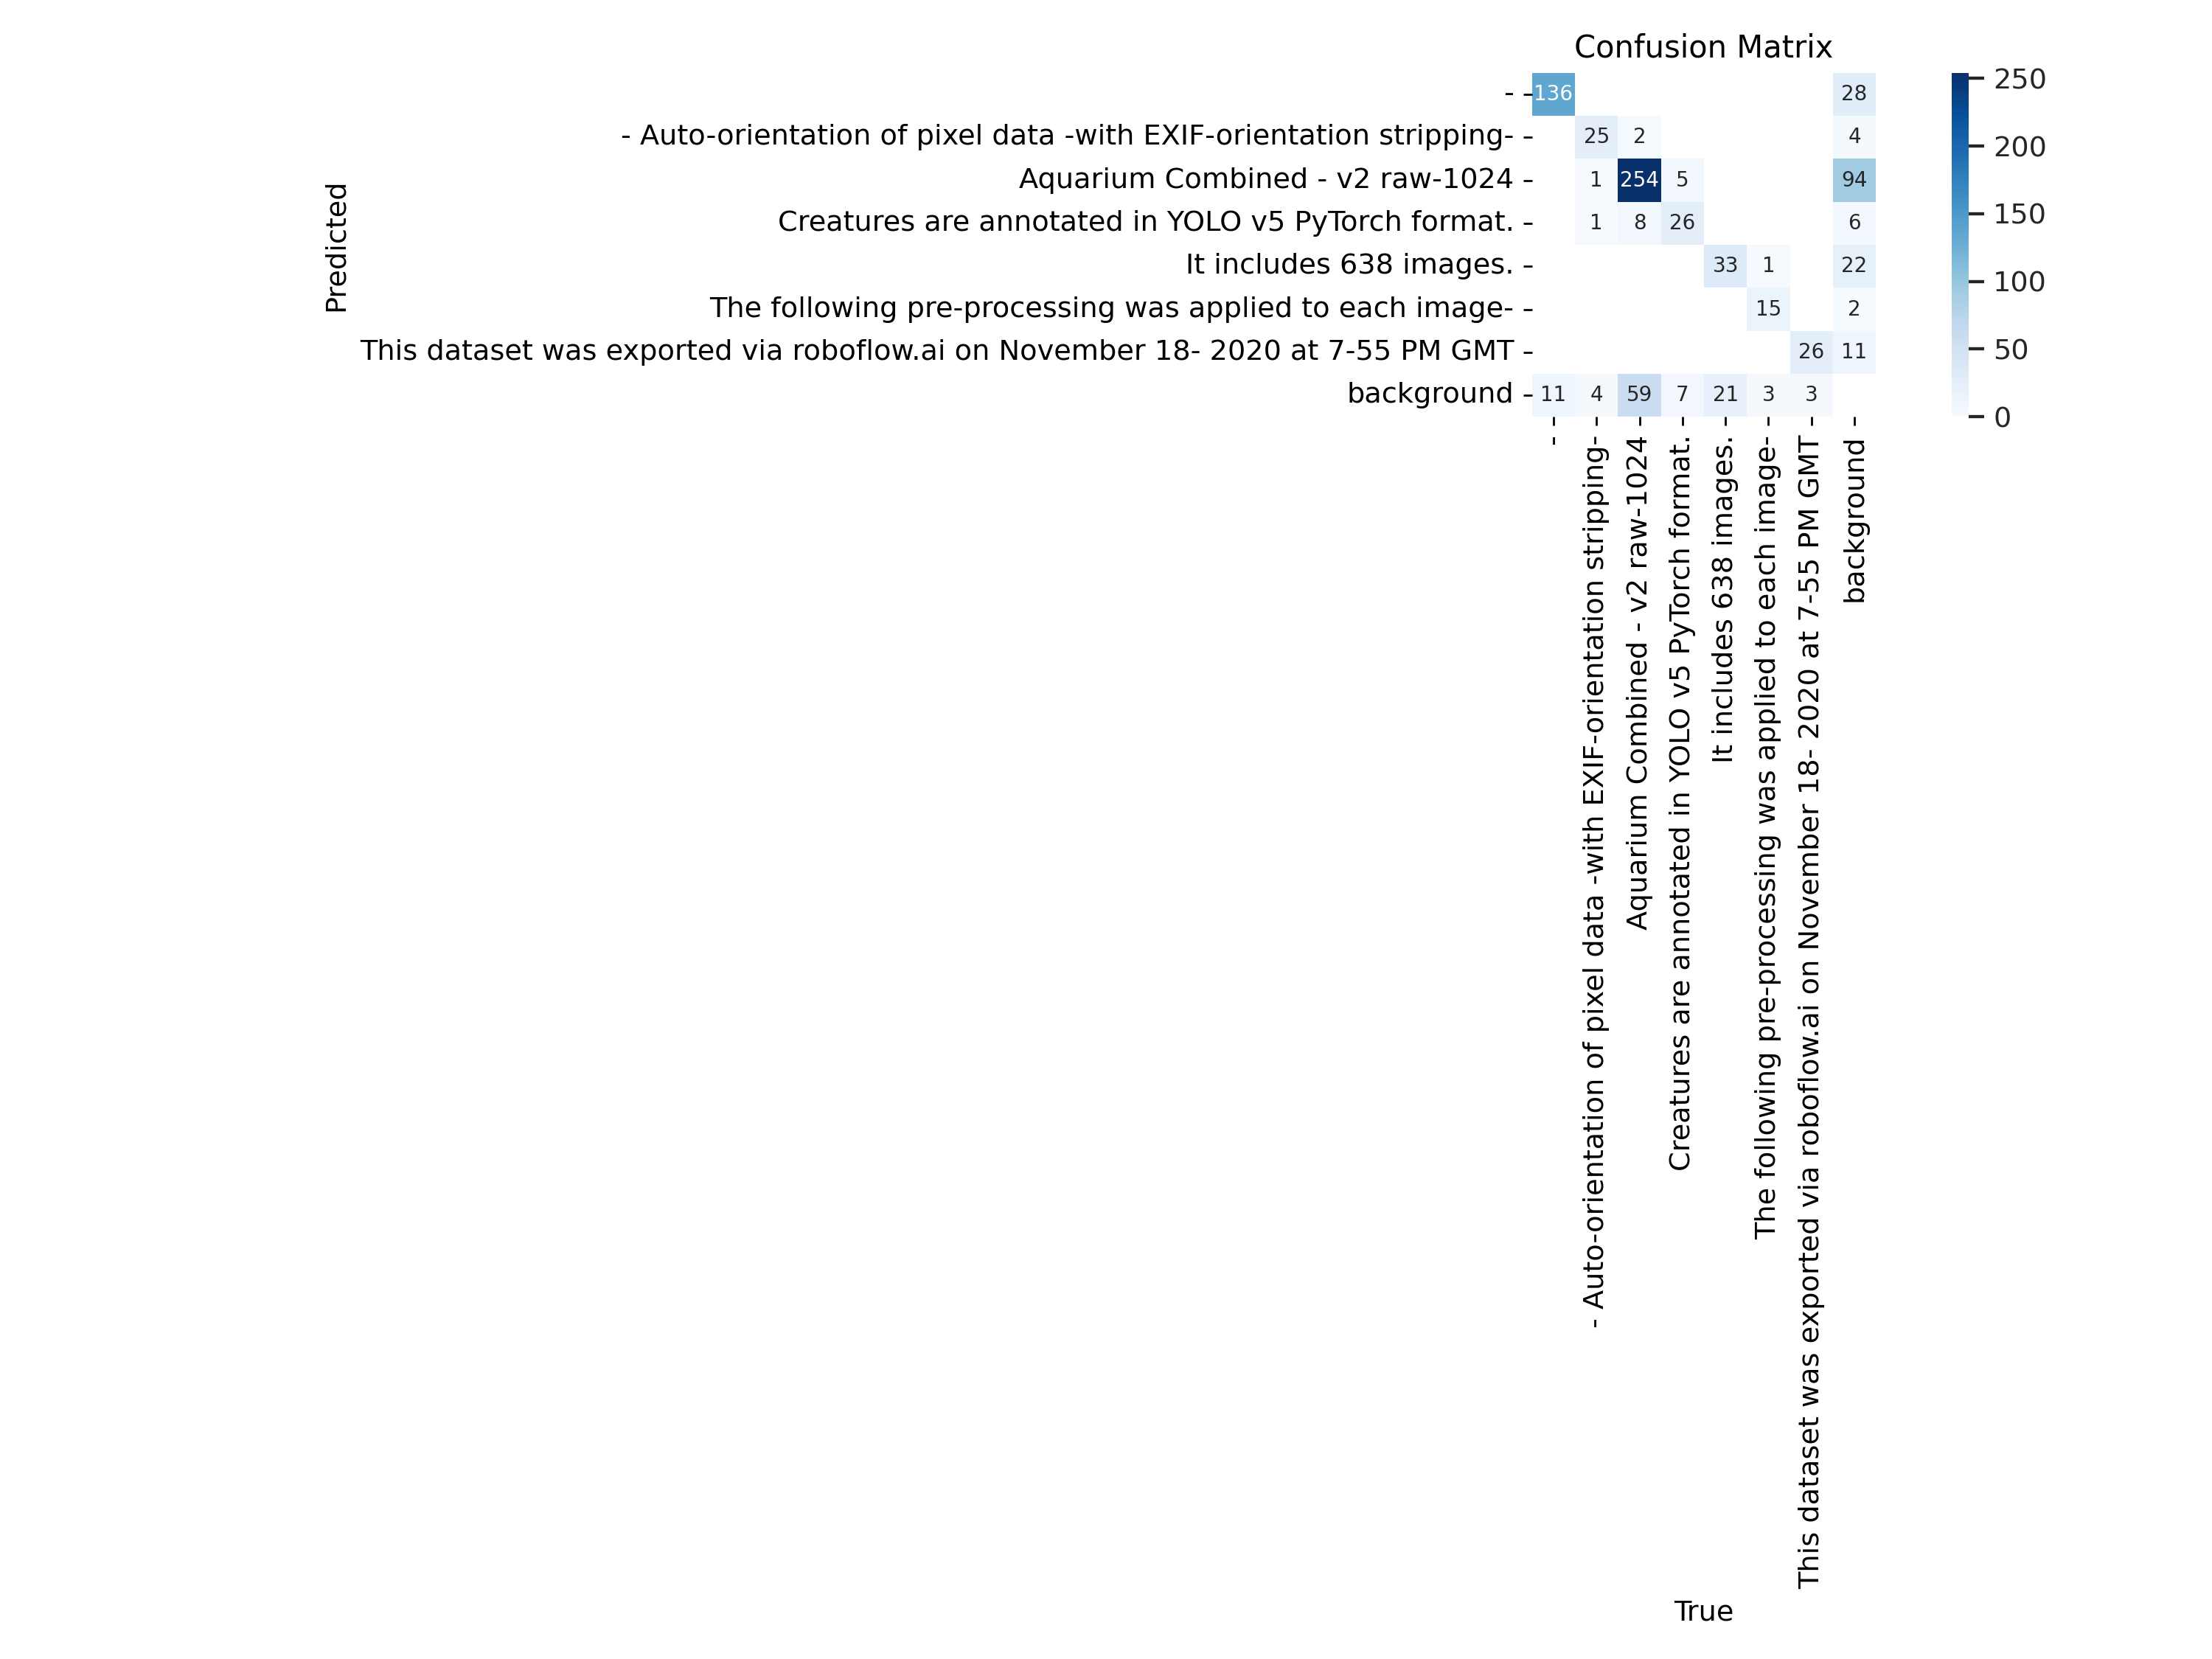

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [36]:
# 4. What output metrices are you analysing. Share concrete results from those.
# precision = 80.0%
# recall = 75.5%
# mAP = 79.4%

/content


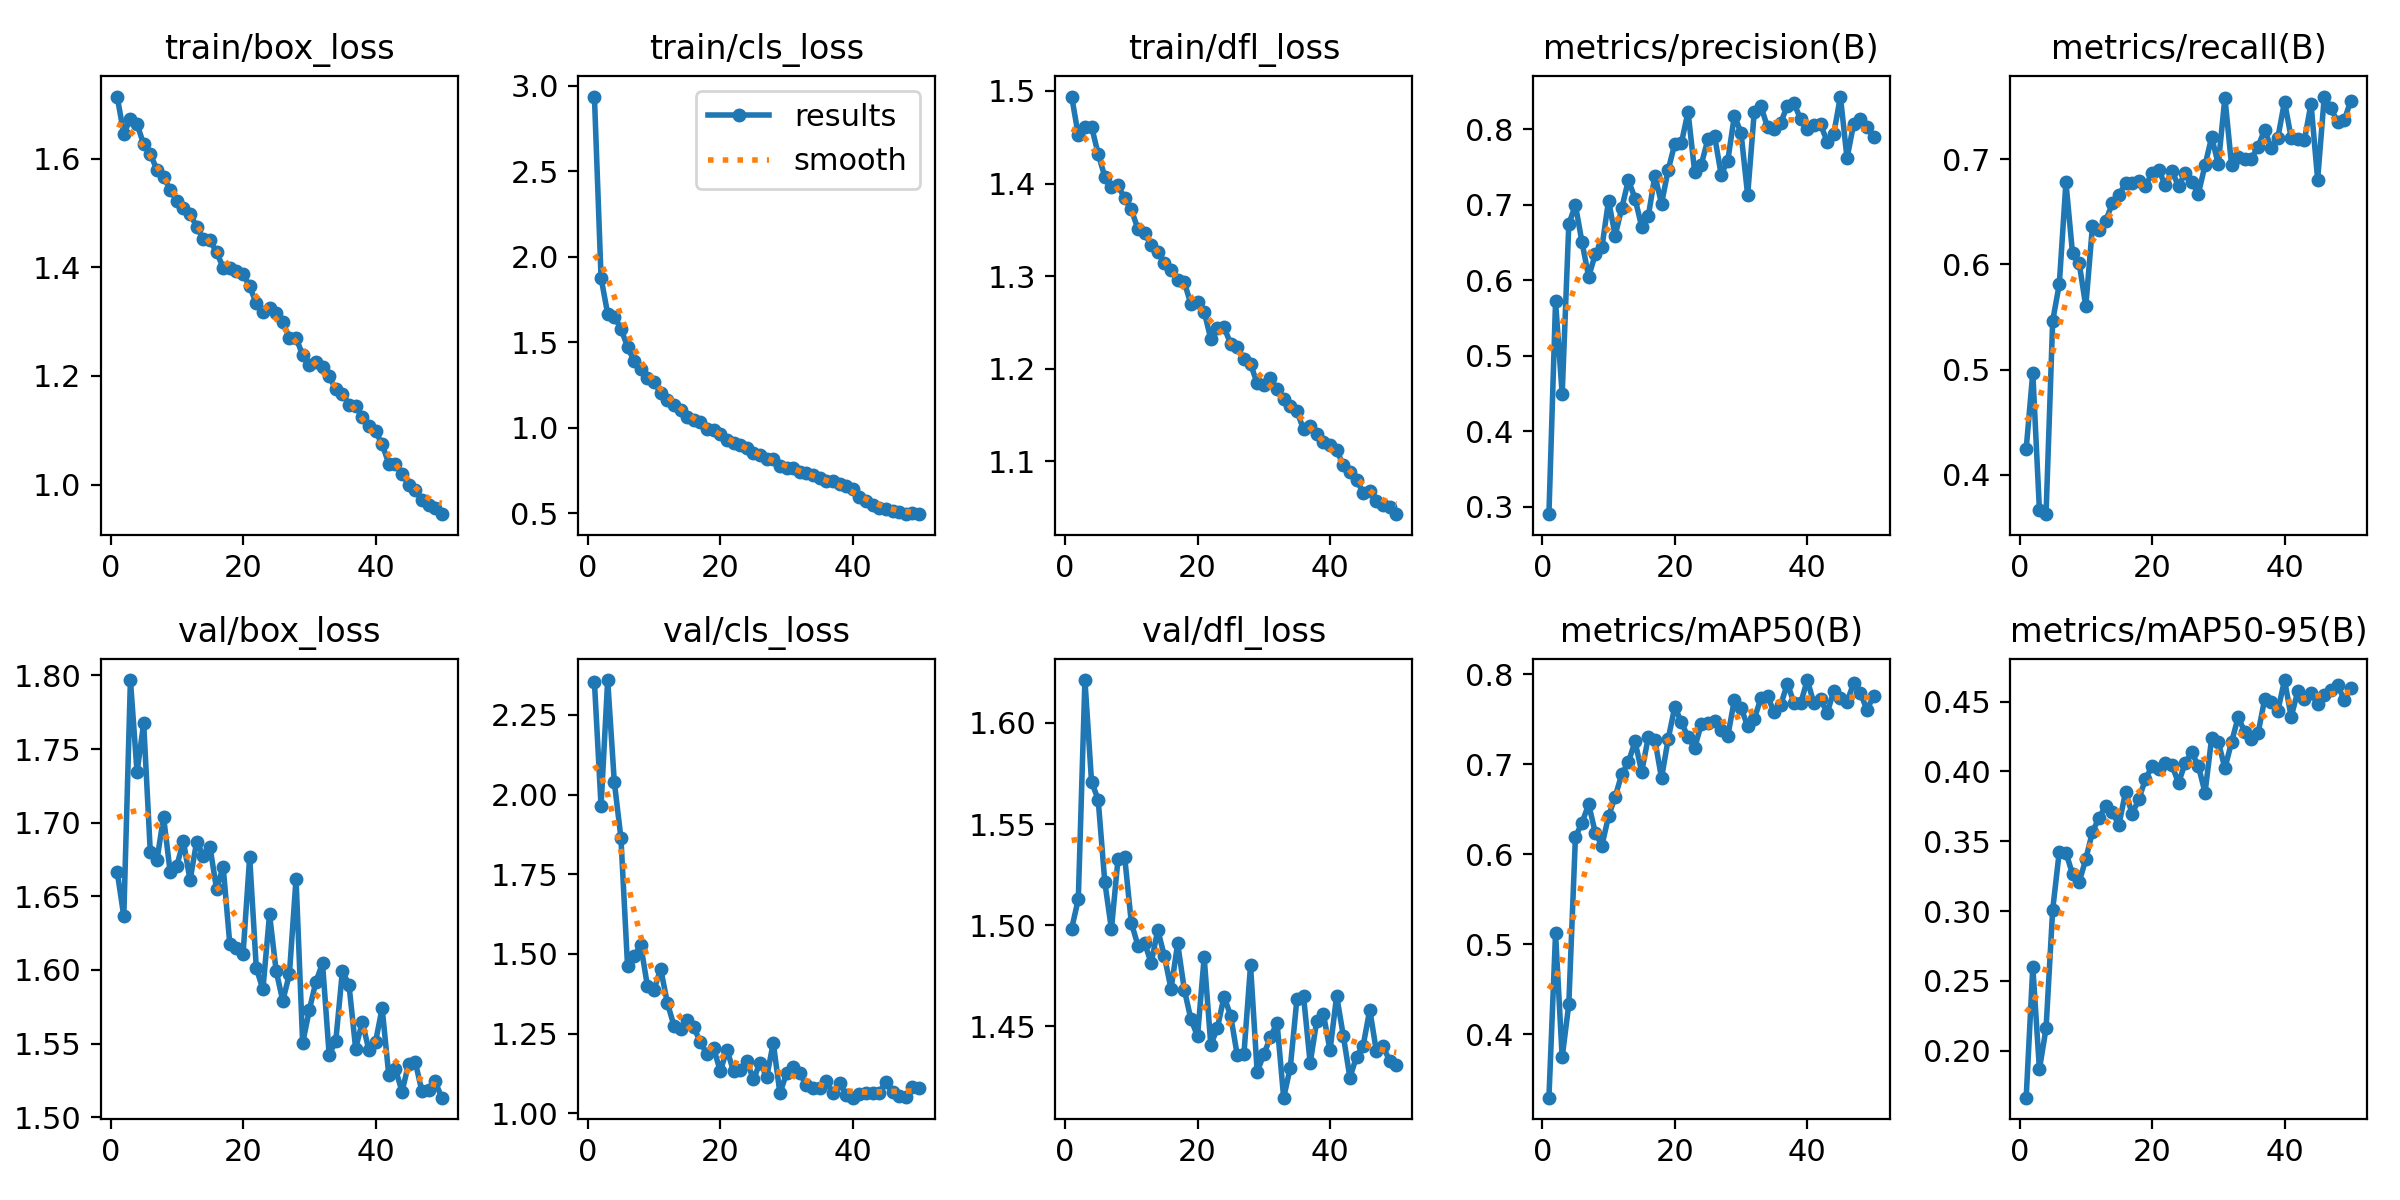

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


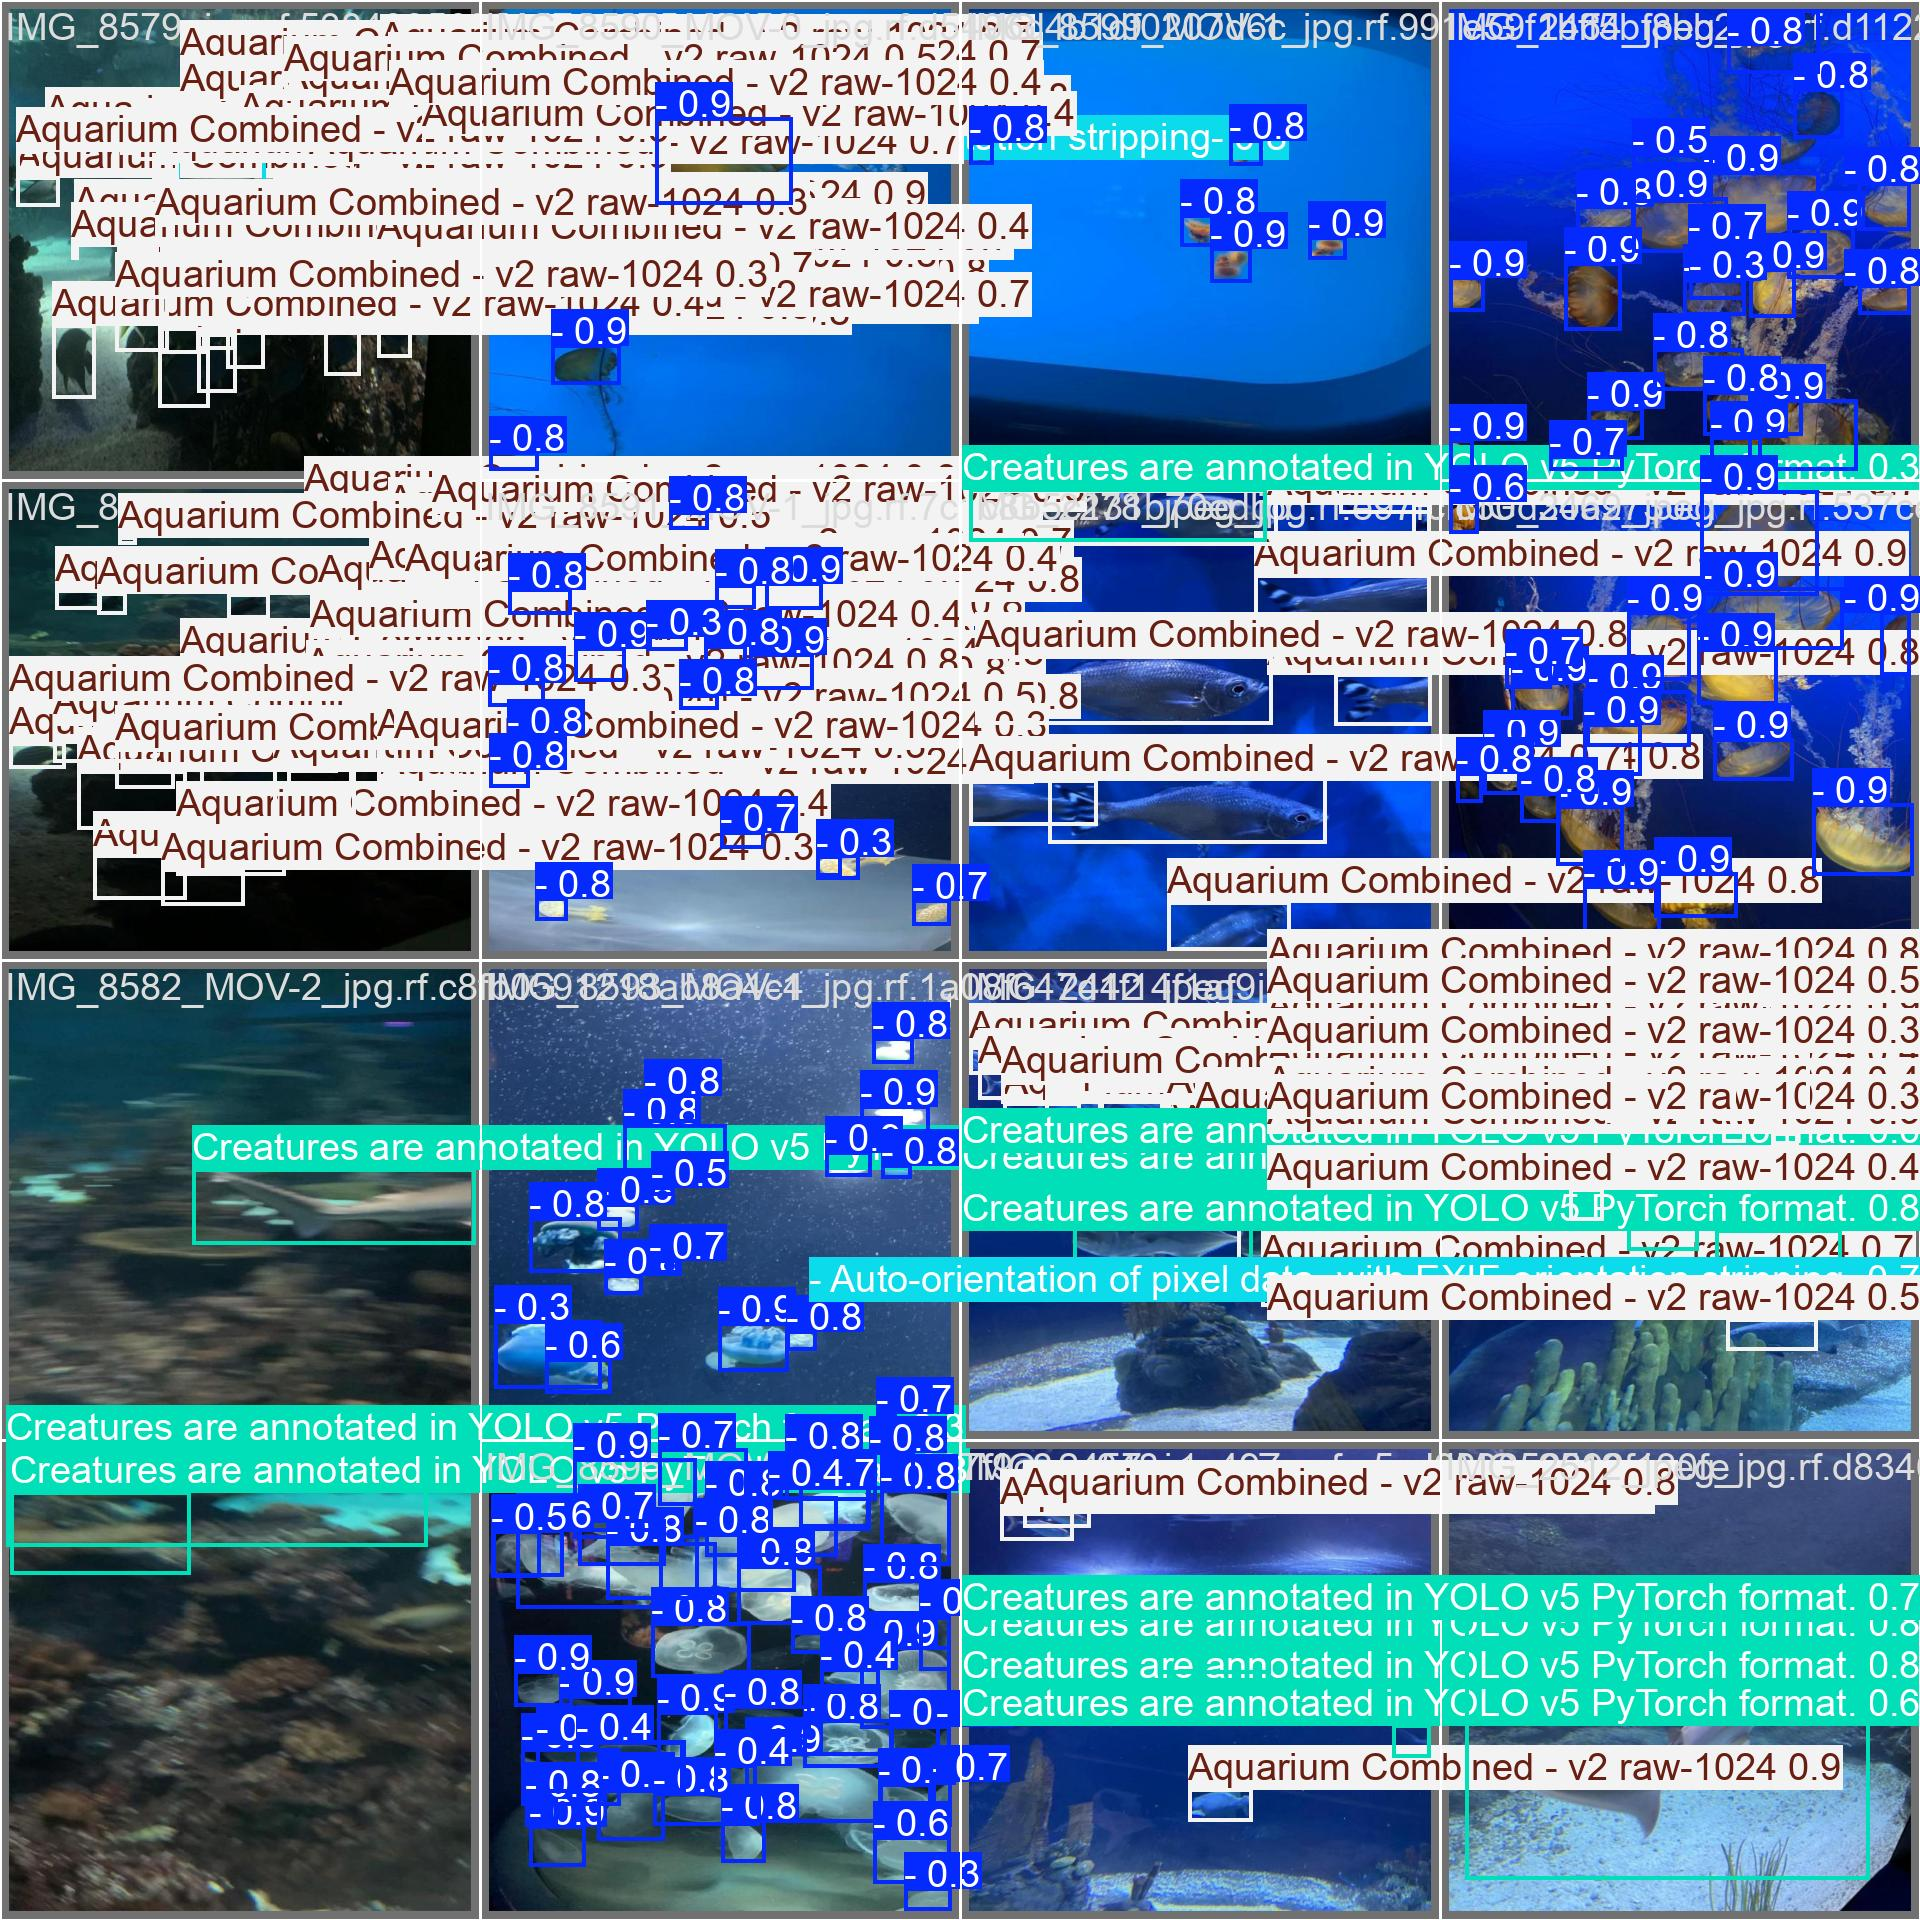

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [26]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

## Inference with Custom Model

In [27]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

**NOTE:** Let's take a look at few results.

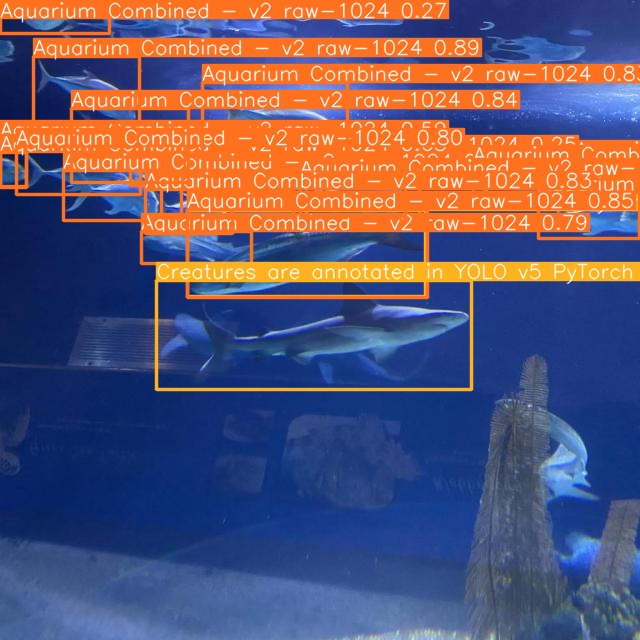

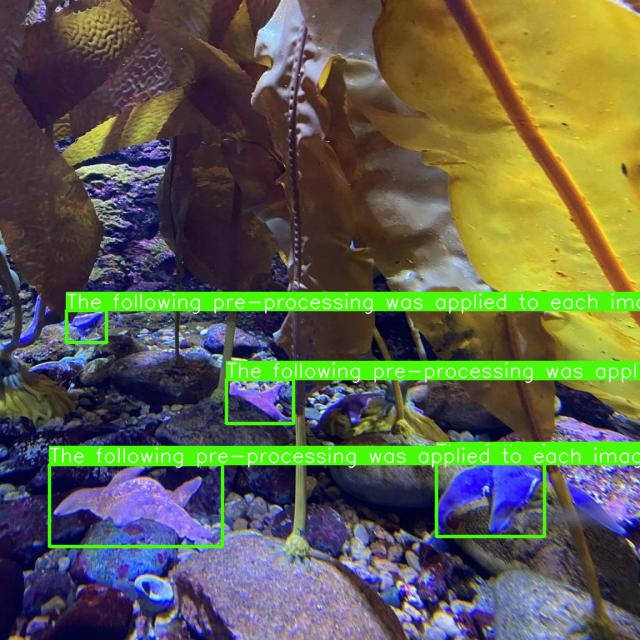

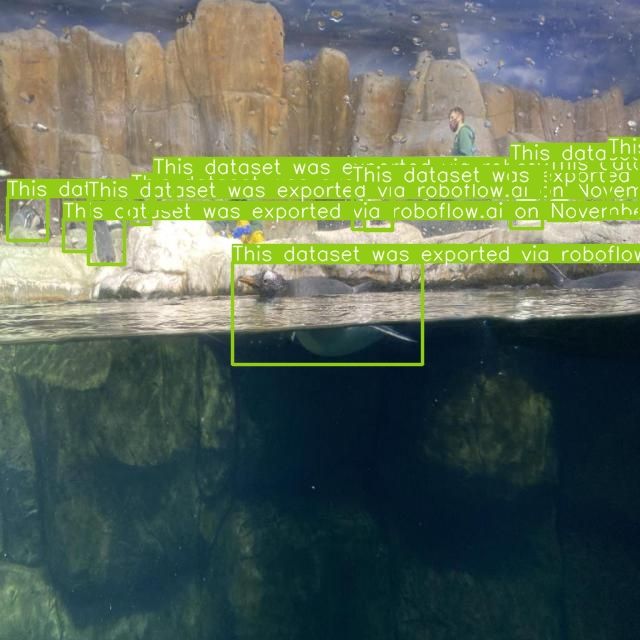

In [28]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

In [29]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [30]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on IMG_2499_jpeg_jpg.rf.ec5cfa306d01e1982ec9836e70db20ae.jpg


{'predictions': [{'x': 199.0,
   'y': 187.0,
   'width': 76.0,
   'height': 28.0,
   'confidence': 0.7581158876419067,
   'class': 'Aquarium Combined - v2 raw-1024',
   'class_id': 2,
   'detection_id': 'bbc5dddb-da28-46fc-bddb-e529c864889d',
   'image_path': '/content/datasets/Underwater-Object-Detection-1/test/images/IMG_2499_jpeg_jpg.rf.ec5cfa306d01e1982ec9836e70db20ae.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 21.0,
   'y': 321.5,
   'width': 40.0,
   'height': 17.0,
   'confidence': 0.7500102519989014,
   'class': 'Aquarium Combined - v2 raw-1024',
   'class_id': 2,
   'detection_id': '1261ad35-4f20-4438-a915-396a706fb07e',
   'image_path': '/content/datasets/Underwater-Object-Detection-1/test/images/IMG_2499_jpeg_jpg.rf.ec5cfa306d01e1982ec9836e70db20ae.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 39.5,
   'y': 335.5,
   'width': 59.0,
   'height': 17.0,
   'confidence': 0.7446508407592773,
   'class': 'Aquarium Combined - v2 raw-1024',
   'class_